In [2]:
import pandas as pd
import numpy as np

df_40 = pd.read_csv("Data/all_opinions_1940.csv")
df_40['date_filed'] = df_40['date_filed'].apply(pd.to_datetime, errors='coerce')
df_40['author_lastname'] = df_40.author_name.apply(lambda x: x.split(" ")[-1]) #get last name of each justice
df_40['author_lastname'] = np.where((df_40['author_lastname'] == 'Roberts') & (df_40['year_filed']<2005), 'Roberts, O.', df_40['author_lastname'])
df_40 = df_40[df_40['per_curiam']==False] # per curiam opinions are opinions the court deemed to be so straightforward there is no named author
df_40 = df_40.drop(columns=['Unnamed: 0','federal_cite_one','absolute_url','cluster','per_curiam'])

print(df_40.shape)
print(df_40.dtypes)
df_40.head(3)

(14924, 11)
author_name                        object
category                           object
case_name                          object
date_filed                 datetime64[ns]
year_filed                          int64
scdb_id                            object
scdb_decision_direction           float64
scdb_votes_majority               float64
scdb_votes_minority               float64
text                               object
author_lastname                    object
dtype: object


,author_name,category,case_name,date_filed,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text,author_lastname
0,Justice Roberts,majority,McCutcheon v. Federal Election Comm'n,2014-04-02,2014,2013-033,1.0,5.0,4.0,There is no right more basic in our democracy ...,Roberts
1,Justice Thomas,concurring,McCutcheon v. Federal Election Comm'n,2014-04-02,2014,2013-033,1.0,5.0,4.0,I adhere to the view that this Court’s decisio...,Thomas
2,Justice Breyer,dissenting,McCutcheon v. Federal Election Comm'n,2014-04-02,2014,2013-033,1.0,5.0,4.0,"Nearly 40 years ago in Buckley v. Valeo, 424 U...",Breyer


In [3]:
from datetime import datetime
df_justice = pd.read_csv("./Data/JusticeData.csv")
df_justice = df_justice.drop(columns=['StateApptFrom'])
df_justice['JusticeLastName'] = df_justice.Name.apply(lambda x: x.split(",")[0]) #get last name of each justice
df_justice[['DateServiceTerminated','JudicialOathTaken']] = df_justice[['DateServiceTerminated','JudicialOathTaken']].apply(pd.to_datetime, errors='coerce')
df_justice['JusticeLastName'] = np.where((df_justice['JusticeLastName'] == 'Roberts') & (df_justice['DateServiceTerminated']<datetime.strptime('January 1, 2005', '%B %d, %Y')), 'Roberts, O.', df_justice['JusticeLastName'])
df_justice = df_justice[(df_justice['DateServiceTerminated'] >= datetime.strptime('January 1, 1940', '%B %d, %Y')) | (df_justice['DateServiceTerminated'].isna()==True)]
df_justice = df_justice.drop_duplicates(subset='Name', keep='first')
df_justice.fillna({'ChiefJustice': 0}, inplace=True)

print(df_justice.shape)
print(df_justice.dtypes)

(44, 6)
ChiefJustice                    float64
Name                             object
AppointedByPresident             object
JudicialOathTaken        datetime64[ns]
DateServiceTerminated    datetime64[ns]
JusticeLastName                  object
dtype: object


In [4]:
df_presidents = pd.read_csv("./Data/PresidentialParty.csv",usecols=['PRESIDENT','POLITICAL PARTY'])
print(df_presidents.shape)
print(df_presidents.dtypes)

df_presidents['LastName'] = df_presidents['PRESIDENT'].apply(lambda x: x.split(" ")[-1]) #get last name of each pres
df_presidents.loc[41, 'LastName'] = 'Bush, G. W.' #deal with weird cases of same last name 
df_presidents.loc[39, 'LastName'] = 'Bush, G. H. W.' 
df_presidents.loc[34, 'LastName'] = 'Johnson, L.'
df_presidents.loc[30, 'LastName'] = 'Roosevelt, F.'
df_presidents.loc[24, 'LastName'] = 'Roosevelt, T.'
df_presidents.loc[8, 'LastName'] = 'Harrison, W. H.'  
df_presidents.loc[5, 'LastName'] = 'Adams, J. Q.'
df_presidents.loc[1, 'LastName'] = 'Adams, J.'  

(45, 2)
PRESIDENT          object
POLITICAL PARTY    object
dtype: object


In [5]:
df_justice.AppointedByPresident = df_justice.AppointedByPresident.astype(str)
df_presidents.LastName = df_presidents.LastName.astype(str)
df_justice = df_justice.merge(df_presidents, left_on='AppointedByPresident', right_on='LastName', how='left').drop(columns=['PRESIDENT','LastName'])
df_40 = df_40.merge(df_justice, left_on='author_lastname', right_on='JusticeLastName', how="left").drop(columns=['author_lastname','JusticeLastName','Name'])

In [6]:
df_40[df_40['POLITICAL PARTY'].isna() == True] #Opinions from 1940 onwards

,author_name,category,case_name,date_filed,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text,ChiefJustice,AppointedByPresident,JudicialOathTaken,DateServiceTerminated,POLITICAL PARTY
52,Justice Holmes,majority,Aikens v. Wisconsin,2005-03-04,2005,NaN,NaN,NaN,NaN,These are three writs of error to the Supreme ...,NaN,NaN,NaT,NaT,NaN
460,Justice Woods,majority,Quebec Bank of Toronto v. Hellman,2007-01-04,2007,NaN,NaN,NaN,NaN,The record discloses the following facts: Geor...,NaN,NaN,NaT,NaT,NaN
2096,Justice O2122,concurring,Peguero v. United States,1999-03-03,1999,1998-026,1.0,9.0,0.0,"I join the opinion of the Court, and I write s...",NaN,NaN,NaT,NaT,NaN
2211,Justice O2122,dissenting,Federal Employees v. Department of Interior,1999-03-03,1999,1998-030,2.0,5.0,4.0,The Court today ignores the plain meaning of t...,NaN,NaN,NaT,NaT,NaN
5491,Justice Waite,majority,Ames v. Kansas Ex Rel. Johnston,2010-03-07,2010,NaN,NaN,NaN,NaN,"He stated the facts in the foregoing language,...",NaN,NaN,NaT,NaT,NaN
6514,Justice Or,concurring,Yates v. United States,1957-06-17,1957,1956-113,2.0,6.0,1.0,Apparently what disturbs the Court now is that...,NaN,NaN,NaT,NaT,NaN
6703,Justice Connor,dissenting,Swidler & Berlin v. United States,1998-06-25,1998,1997-094,2.0,6.0,3.0,Although the attorney-client privilege ordinar...,NaN,NaN,NaT,NaT,NaN
8398,Justice And,concurring,"Moseley v. Electronic & Missile Facilities, Inc.",1963-06-17,1963,1962-146,2.0,8.0,1.0,We agree with the Court that fraud in the proc...,NaN,NaN,NaT,NaT,NaN
9627,Justice Fuller,majority,Fisher v. Baker,2010-10-09,2010,1906-017,1.0,8.0,0.0,Application for the writ of habeas corpus was ...,NaN,NaN,NaT,NaT,NaN


In [7]:
#Text field is the opinion
#important: Authorname, case_name, category, date_filed,

## Transforming Data

We are going to create lists of the authors of every case and their political affiliation. 

In [8]:
authors = df_40['author_name']
category = df_40['category']
case_name = df_40['case_name']
year = df_40['year_filed']
political_aff = df_40['POLITICAL PARTY']
case_txt = df_40['text']
case_id = df_40['scdb_id']

* We are going to create a list of lists that have the words of the cases

In [9]:
import re

stop_words = ['..','__','___','___','_','-','--','there','.',';',':','the','to','in','rt','of','a', 'for','and','is','on','amp','you','i','at','will','our','we','be','with','that','it','this','are','https','s','have','by','from','has','all','as','not','was','out','t','your','my','who','her','me','he','about','so','make','just''2','w','she','they','us','his','if','up','again','an','what','one','no','here','but','can','last','than','were','do','would','been','am','http','had','when','made','them','or','there','another','isil','aumf','youre']
w_txt = [sentence.lower().split() for sentence in case_txt] #CHANGE AT THE END!!!

words_txt = [[word for word in k if word not in stop_words 
            and re.match('[a-zA-Z]+$', word)] for k in w_txt]

* Let's see the frequency of the words

In [10]:
words = [word for sentence in words_txt for word in sentence]

from collections import Counter

freq = Counter(words)
f = sorted([(freq[k],k) for k in freq], reverse = True)

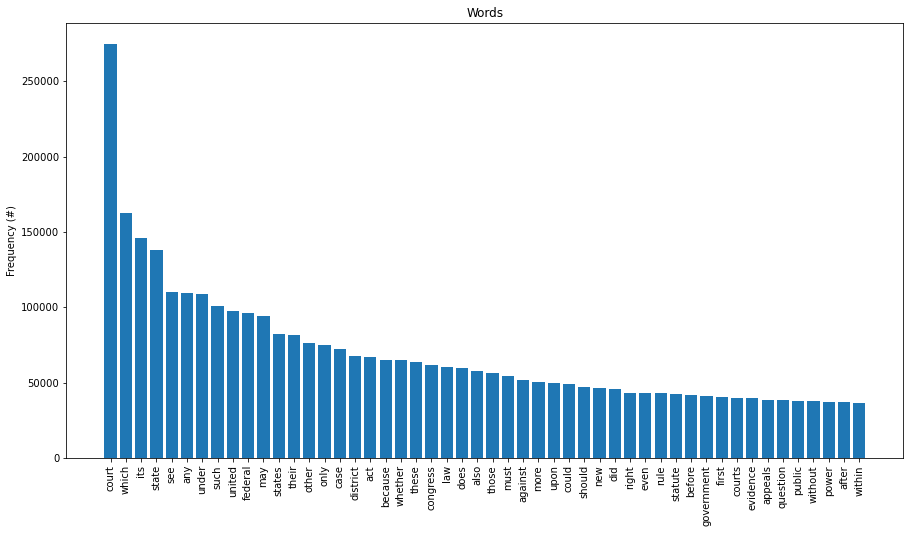

In [11]:
import matplotlib.pyplot as plt

fr = f[:50]
w_w = [k for v,k in fr]
f_w = [v for v,k in fr]
plt.figure(figsize=(15, 8))
plt.bar(w_w,f_w)
plt.ylabel("Frequency (#)")
plt.title("Words")
plt.xticks(rotation=90)
plt.show()

* Let's differentiate between Republicans and Democrats

In [38]:
l = range(len(political_aff))

## DEMOCRATS

authors_D = [authors[i] for i in l if political_aff[i] == 'Democratic']
category_D = [category[i] for i in l if political_aff[i] == 'Democratic']
case_name_D = [case_name[i] for i in l if political_aff[i] == 'Democratic']
year_D = [year[i] for i in l if political_aff[i] == 'Democratic']
political_aff_D = [political_aff[i] for i in l if political_aff[i] == 'Democratic']
case_txt_D = [case_txt[i] for i in l if political_aff[i] == 'Democratic']
case_id_D = [case_id[i] for i in l if political_aff[i] == 'Democratic']
words_txt_D = [words_txt[i] for i in l if political_aff[i] == 'Democratic']

words_D = [word for sentence in words_txt_D for word in sentence]
freq_D = Counter(words_D)
f_D = sorted([(freq_D[k],k) for k in freq_D], reverse = True)
w_w_D = [k for v,k in f_D]
f_w_D = [v for v,k in f_D]

## REPUBLICANS

authors_R = [authors[i] for i in l if political_aff[i] == 'Republican']
category_R = [category[i] for i in l if political_aff[i] == 'Republican']
case_name_R = [case_name[i] for i in l if political_aff[i] == 'Republican']
year_R = [year[i] for i in l if political_aff[i] == 'Republican']
political_aff_R = [political_aff[i] for i in l if political_aff[i] == 'Republican']
case_txt_R = [case_txt[i] for i in l if political_aff[i] == 'Republican']
case_id_R = [case_id[i] for i in l if political_aff[i] == 'Republican']
words_txt_R = [words_txt[i] for i in l if political_aff[i] == 'Republican']

words_R = [word for sentence in words_txt_R for word in sentence]
freq_R = Counter(words_R)
f_R = sorted([(freq_R[k],k) for k in freq_R], reverse = True)
w_w_R = [k for v,k in f_R]
f_w_R = [v for v,k in f_R]

* Frequency of words for each Democratic and Republican party

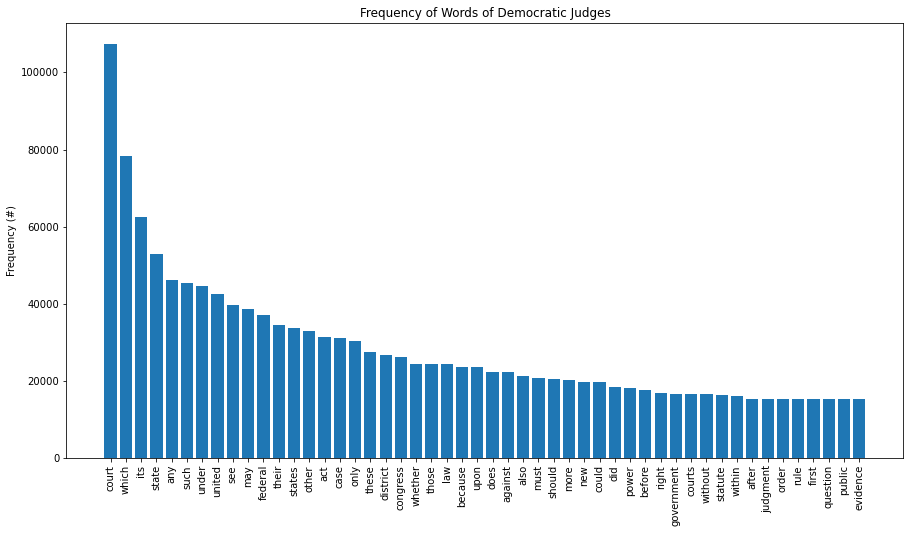

In [39]:
plt.figure(figsize=(15, 8))
plt.bar(w_w_D[:50],f_w_D[:50])
plt.title("Frequency of Words of Democratic Judges")
plt.ylabel("Frequency (#)")
plt.xticks(rotation=90)
plt.show()

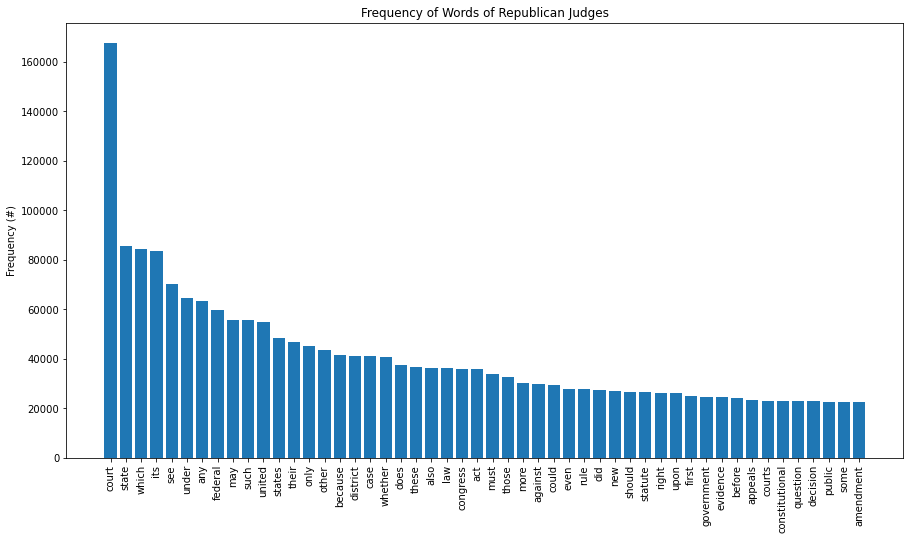

In [40]:
plt.figure(figsize=(15, 8))
plt.bar(w_w_R[:50],f_w_R[:50])
plt.title("Frequency of Words of Republican Judges")
plt.ylabel("Frequency (#)")
plt.xticks(rotation=90)
plt.show()

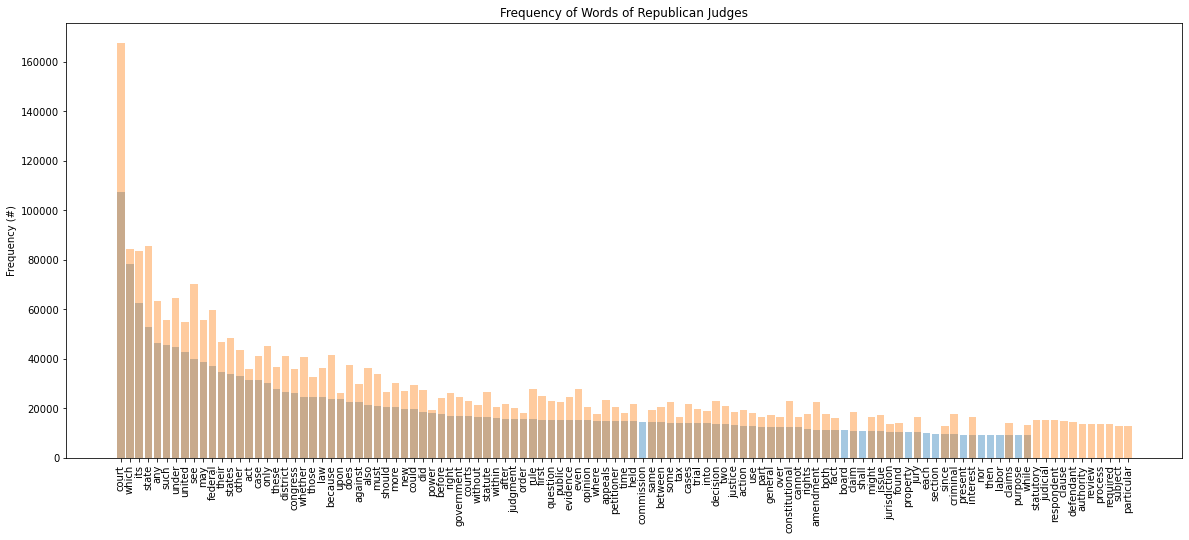

In [44]:
plt.figure(figsize=(20, 8))
plt.bar(w_w_D[:100],f_w_D[:100], alpha=0.4)
plt.bar(w_w_R[:100],f_w_R[:100], alpha=0.4)
plt.title("Frequency of Words of Republican Judges")
plt.ylabel("Frequency (#)")
plt.xticks(rotation=90)
plt.show()